# Supervised Learning

Very simply put supervised learning is the process of fitting any given function to a set of labelled data. In the sections that follow we will walk through some of the more common supervised learning algorithms that are likely to encounter on the path to machine mastery. This notebook will try to use the [scikit-learn](http://scikit-learn.org/stable/ "scikit-learn homepage") library to implement each of these algorithms with ease and simplicity. The algorithms we will be looking at are:
- [k-Nearest Neighbours](#knn)
- [Naive Bayes](#naive_bayes)
- [Linear Regression](#linear_regression)
- [Logistic Regression](#logistic_regression)
- [Decision Trees](#decision_trees)
- [Support Vector Machines](#svm)

In [5]:
# Import the necessary libraries
import urllib
from sklearn import datasets, model_selection, neighbors, linear_model, tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

ImportError: cannot import name model_selection

In [ ]:
# This is a handy plotting function
from matplotlib.colors import ListedColormap

def visualise_decision_surface(X, y, clf):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    x_min -= 0.1*np.abs(x_min)
    x_max += 0.1*np.abs(x_max)
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    y_min -= 0.1*np.abs(y_min)
    y_max += 0.1*np.abs(y_max)
    hx = (x_max - x_min) / 1000
    hy = (y_max - y_min) / 1000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if type(Z[0][0]) == str:
        y = (y == Z[0][0])
        Z = (Z == Z[0][0])

    my_cmap = ListedColormap(sns.color_palette("deep").as_hex())
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=my_cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=my_cmap)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.show()

## k-Nearest Neighbours <a id='knn'></a>

k-Nearest Neighbours, or kNN, is one of the simplest supervised machine learning algorithms. First introduced in [1970](http://www.dtic.mil/dtic/tr/fulltext/u2/a800276.pdf "Discriminatory analysis, nonparametric discrimination: Consistency properties") the principle behind kNN is very simple; find $k$ points in the existing dataset that are "closest" to the point you wish to analyse, make a prediction based off their values. You could make your prediction in two ways, depending on your problem: either regression or classification. For example, given a dataset containing information on housing prices you could try to estimate the value of a property using *regression* (say by taking the average of your neighbours) or you could try to *classify* the property as, "buy," "sell" or "hold" (by choosing the majority class in your neighbourhood).

### kNN Classification 

Let's jump straight into it! Scikit-learn has a whole bunch of different [nearest neighbour](http://scikit-learn.org/stable/modules/neighbors.html "sklearn nearest neighbour techniques") implementations built in. Lets just play with some toy data for now

In [4]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0)

# Split into test / train sets and label / feature vectors
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

NameError: name 'datasets' is not defined

In [172]:
# Create classifier
knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(X_train, 
                   y_train)

# Classify test set
knn_classifier.score(X_test,
                     y_test)

0.876

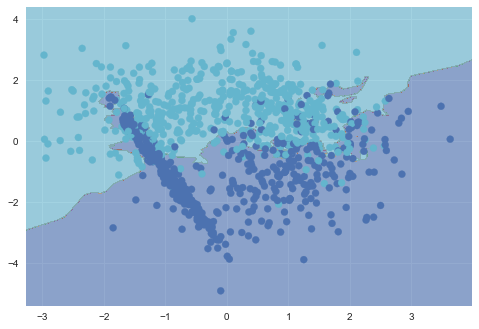

In [175]:
visualise_decision_surface(X, y, knn_classifier)

We are going to grab the [breast cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 "UCI repository breast cancer dataset") from the [UCI ML repo](https://archive.ics.uci.edu/ml/index.php "UCI machine learning repository") and see if we can't classify some suspicious tumours as either "benign" or "malignant." If you are interested in the dataset you can check out the [schema](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names "breast cancer Wisconsin dataset schema"). This dataset should be a little more challenging as we now have an input vector of length 30.

In [167]:
# Download the dataset and load it into pandas dataframe
bcwd_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
feature_names = ["ID number", "diagnosis",
                 "radius - mean", "texture - mean", "perimeter - mean", "area - mean", "smoothness - mean", "compactness - mean", "concavity - mean", "concave points - mean", "symmetry - mean", "fractal dimension - mean",
                 "radius - std err", "texture - std err", "perimeter - std err", "area - std err", "smoothness - std err", "compactness - std err", "concavity - std err", "concave points - std err", "symmetry - std err", "fractal dimension - std err",
                 "radius - largest", "texture - largest", "perimeter - largest", "area - largest", "smoothness - largest", "compactness - largest", "concavity - largest", "concave points - largest", "symmetry - largest", "fractal dimension - largest"
                ]
mcwd_df = pd.read_csv(bcwd_url,
                      delimiter=",",
                      header=None,
                      names=feature_names,    # Strings for our column headings
                      index_col=0,
                     )

In [168]:
# Split into test / train sets and label / feature vectors
train_df, test_df = model_selection.train_test_split(mcwd_df)

X_train = train_df.iloc[:,-30:].as_matrix()
y_train = train_df["diagnosis"].as_matrix()

X_test = test_df.iloc[:,-30:].as_matrix()
y_test = test_df["diagnosis"].as_matrix()

X_vis = X_train[:, [0,4]]
y_vis = y_train

In [169]:
# Create classifier
knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(X_train, 
                   y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [170]:
# Classify test set
knn_classifier.score(X_test,
                     y_test)

0.92307692307692313

**Challenge -** May you could try changing the number of nearest neighbours and see how that affects the result.

### kNN Regression 

This time we will use the [Beijing PM$_{2.5}$](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data "UCI repository Beijing PM2.5 dataset") from the [UCI ML repo](https://archive.ics.uci.edu/ml/index.php "UCI machine learning repository") to see wether we can do some regression using a kNN algorithm. We will see if we can predict the [PM$_{2.5}$](http://www.epa.vic.gov.au/your-environment/air/air-pollution/pm25-particles-in-air "EPA description of PM2.5") concentration in Beijing given the local weather conditions.

In [16]:
# Download the dataset and load it into pandas dataframe
pm25_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
pm25_df = pd.read_csv(pm25_url,
                      delimiter=",",
                      header=0,
                      index_col=0,
                     )
pm25_df = pm25_df.dropna()

In [17]:
# Handle categorical data
labeler = LabelEncoder()
pm25_df["cbwd"] = labeler.fit_transform(pm25_df["cbwd"])

In [18]:
# Split into test / train sets and label / feature vectors
train_df, test_df = model_selection.train_test_split(pm25_df)

X_train = train_df.iloc[:,-7:].as_matrix()
y_train = train_df["pm2.5"].as_matrix()

X_test = test_df.iloc[:,-7:].as_matrix()
y_test = test_df["pm2.5"].as_matrix()

In [19]:
# Create classifier
knn_regression = neighbors.KNeighborsRegressor(n_neighbors=25)
knn_regression.fit(X_train, 
                   y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=25, p=2,
          weights='uniform')

In [20]:
# Classify test set
knn_regression.score(X_test,
                     y_test)

0.38774322541562312

In [1]:
knn_predictions = knn_regression.predict(X_test)
plt.plot(y_test[:100])
plt.plot(knn_predictions[:100],'r')
plt.xlabel("time")
plt.ylabel("PM2.5 concentration")
plt.show()

NameError: name 'knn_regression' is not defined

Well I guess *sometimes* these things don't work out. Can you think why this technique is not particularly well suited to the problem at hand? Can you think of something we could do to improve the result?

**Challenge -** The nearest neighbour algorithms have many parameters to tune. Check out the [documentation]() and play with parameters to see if you can improve the result.

Speak about the theory in a little more depth. Distance metrics, etc

## Naive Bayes <a id='naive_bayes'></a>

Still under construction :-(

## Linear Regression <a id='linear_regression'></a>

Okay, we are going to cheat a little bit a create some "random" data to fit a linear line to.

In [128]:
# Create some linear data with a little bit of random noise
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.rand(1000, 1)*(X+0.5)*(2.5-X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

There are two ways to perform linear regression. You can either solve it exactly using some matrix gymnastics

In [129]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train,
                      y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
linear_regression.score(X_test,
                        y_test)

0.89245946675786403

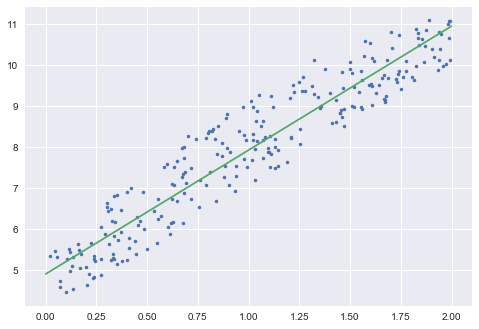

In [140]:
X_plot = np.linspace(0, 2, 10)
X_plot = X_plot.reshape(-1, 1)
y_plot = linear_regression.predict(X_plot)

plt.plot(X_test,
         y_test,
         '.')
plt.plot(X_plot,
         y_plot)
plt.show()

Which works great unless your dataset is very large.

Or you can try to find the best fit using some sort of optimisation algorithm. Here we use an SGD method. This is great, because it can learn in an online fashion, reducing the required memory overhead.

In [26]:
linear_regression = linear_model.SGDRegressor(n_iter=500)
linear_regression.fit(X_train,
                      np.ravel(y_train))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=500, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [27]:
linear_regression.score(X_test,
                        y_test)

0.91080833211787915

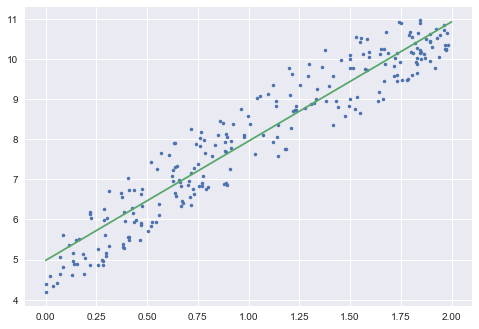

In [28]:
X_plot = np.linspace(0, 2, 10)
X_plot = X_plot.reshape(-1, 1)
y_plot = linear_regression.predict(X_plot)

plt.plot(X_test,
         y_test,
         '.')
plt.plot(X_plot,
         y_plot)
plt.show()

Compare the two methods. Do the differ by much? Which [parameters](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) can you change to close the gap?

## Logistic Regression <a id='logistic_regression'></a>

You can also perform regressions on categorical data.

In [127]:
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [128]:
log_reg = linear_model.LogisticRegression(multi_class="multinomial",
                                          solver="lbfgs",
                                          C=10,
                                         )
log_reg.fit(X_train,
            y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [129]:
log_reg.score(X_test,
              y_test
             )

0.92105263157894735

## Decision Trees <a id='decision_trees'></a>

Decision trees are fantastics because they offer some intuition into the fitting process. A decision tree essentially specifies threshold values in each unique feature, and makes classifications based on which side of the threshold your features lie.

In [2]:
# Download the dataset and load it into pandas dataframe
mushroom_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
feature_names = ["edibility", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size",
                 "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
                 "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", 
                 "ring-type", "spore-print-color", "population", "habitat"]
class_names = ["edible", "poisonous"]
mushroom_df = pd.read_csv(mushroom_url,
                      delimiter=",",
                      header=None,
                      names=feature_names,    # Strings for our column headings
                     )

In [3]:
labeler = LabelEncoder()
for column in mushroom_df:
    mushroom_df[column] = labeler.fit_transform(mushroom_df[column])

In [4]:
# Test / train split
train_df, test_df = model_selection.train_test_split(mushroom_df)

X_train = train_df.iloc[:,1:].as_matrix()
y_train = train_df.iloc[:,0].as_matrix()

X_test = test_df.iloc[:,1:].as_matrix()
y_test = test_df.iloc[:,0].as_matrix()

In [5]:
tree_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree_clf.fit(X_train,
             y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
tree_clf.score(X_test,
               y_test)

0.97784342688330872

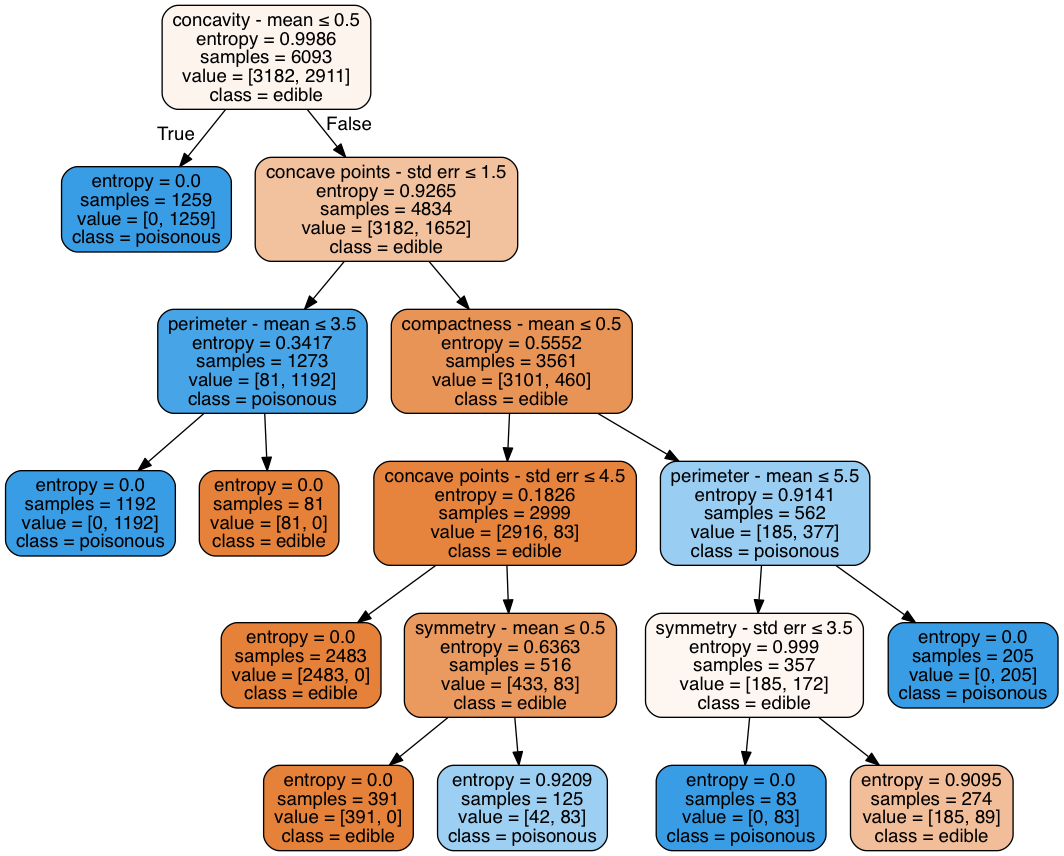

In [176]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Suport Vector Machines <a id='svm'></a>

In [31]:
from sklearn import pipeline,  svm
from sklearn.preprocessing import StandardScaler

In [76]:
iris = datasets.load_iris()
X = iris["data"][:,(2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

svm_clf = pipeline.Pipeline((
                             ("scaler", StandardScaler()),
                             ("linear_svc", svm.LinearSVC(C=1, loss="hinge")),
                           ))
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.97368421052631582

<class 'numpy.float64'>
0.0


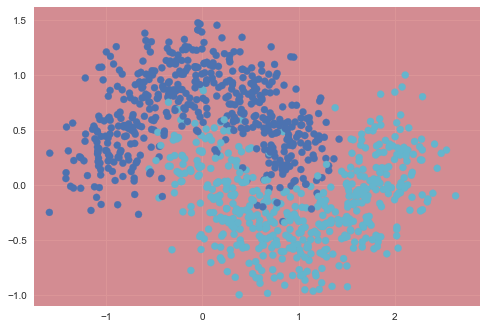

In [123]:
visualise_decision_surface(X, y, svm_clf)

In [34]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [142]:
X, y = make_moons(n_samples=1000, noise=0.25)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [143]:
polynomial_svm_clf = pipeline.Pipeline((
                                        ("poly_features", PolynomialFeatures(degree=3)),
                                        ("scaler", StandardScaler()),
                                        ("smv_clf", svm.LinearSVC(C=10, loss="hinge"))
                                      ))
polynomial_svm_clf.fit(X_train,
                       y_train)
polynomial_svm_clf.score(X_test,
                       y_test)

0.94399999999999995

<class 'numpy.int64'>
0


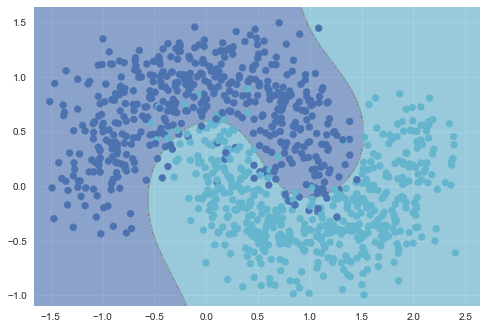

In [144]:
visualise_decision_surface(X, y, polynomial_svm_clf)

In [145]:
poly_kernel_svm_clf = pipeline.Pipeline((
                                         ("scaler", StandardScaler()),
                                         ("svm_clf", svm.SVC(kernel="poly", degree=3, coef0=1, C=5))))
poly_kernel_svm_clf.fit(X_train,
                        y_train)
poly_kernel_svm_clf.score(X_test,
                        y_test)

0.94399999999999995

<class 'numpy.int64'>
0


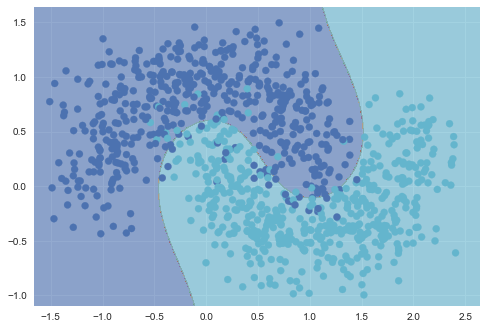

In [146]:
visualise_decision_surface(X, y, poly_kernel_svm_clf)

In [147]:
rbf_kernel_svm_clf = pipeline.Pipeline((("scaler", StandardScaler()),
                                        ("svm_clf", svm.SVC(kernel="rbf", gamma=5, C=0.001))
                                      ))
rbf_kernel_svm_clf.fit(X_train,
                       y_train)
rbf_kernel_svm_clf.score(X_test,
                         y_test)

0.93999999999999995

<class 'numpy.int64'>
0


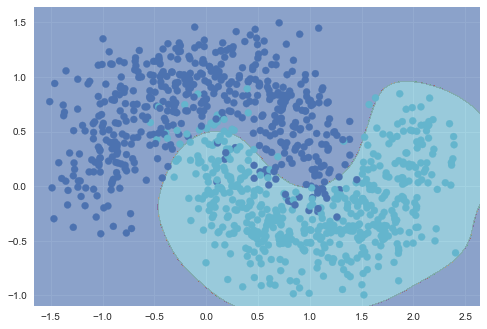

In [148]:
visualise_decision_surface(X, y, rbf_kernel_svm_clf)